In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Latex

### Tutorial I: Verify that the Universe is compatible with a flat universe

We are going to calculate the power spectrum of the CMB data from WMAP (I could not find the more recent Planck data). We are going to use ```healpy``` to calculate the power spectrum so in case the module is not installed we can simply do:

```pip install healpy```

In [78]:
import healpy as hp

First we are goint to download the WMAP data, this data is unmasked it means that contamination from the galactic plane, starts and any other frecuencies has not been removed. We are going to download the data using python

In [79]:
import urllib
import gzip

url = "https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_imap_r9_7yr_W_v4.fits"
file = urllib.urlopen(url)
with open("wmap.fits", "wb") as local_file:
    local_file.write(file.read())

We can check the file exits using a the magic command ```%ls wmap.fits``` (only in Linux/Windows)

In [80]:
%ls wmap.fits

wmap_map_I = hp.read_map('wmap.fits')


wmap.fits
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


After that we can use healpy to make a plot of data, using for example the mollview projection. 

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


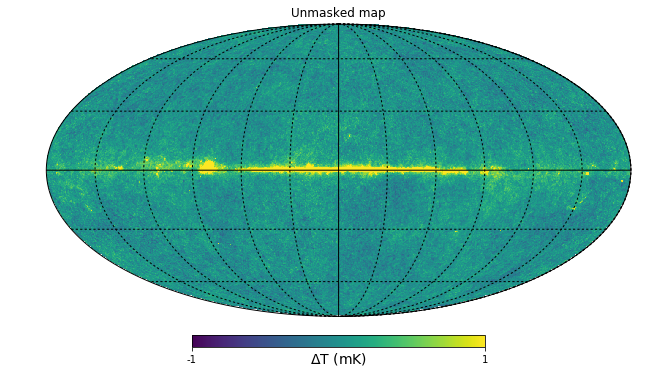

In [82]:
hp.mollview(wmap_map_I, min=-1, max=1, title='Unmasked map', unit=r'$\Delta$T (mK)')
hp.graticule()

As can be seen the Galactic Plane is clearly visible, so we and some other sources in the sky. We need to download the mask used in the WMAP analysis that will hide part of the sky. The maks is a map, same as data, but with booleans.

In [57]:
url= "https://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits"

file = urllib.urlopen(url)
with open("wmap_mask.fits", "wb") as local_file:
    local_file.write(file.read())

In [ ]:
#We read the map but we specify it is of the type bool

mask = hp.read_map('wmap_mask.fits').astype(np.bool)

After that we are going to apply the mask to the wmap we had before. For that we transform the healpy map into a masked map, and we assign the mask to our download map

In [84]:
wmap_masked = hp.ma(wmap_map_I)
wmap_masked.mask = np.logical_not(mask)

If we make plot the map again we see that the region of the galactic plane has been masked out.

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


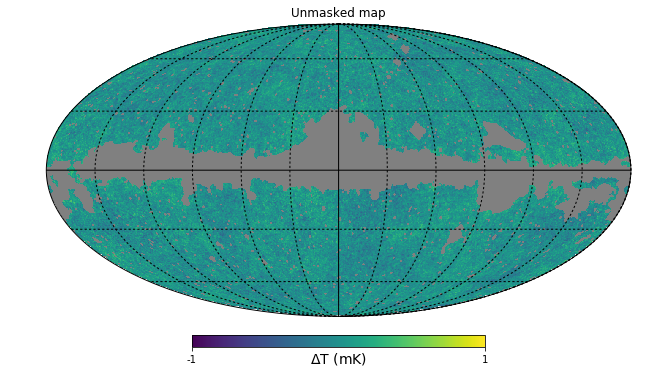

In [85]:
hp.mollview(wmap_masked.filled(), min=-1, max=1, title='Unmasked map', unit=r'$\Delta$T (mK)')
hp.graticule()

Now we are going to calculate the power-spectrum which is calculated by the healpy method ```anafast``

In [86]:
cl = hp.anafast(wmap_masked.filled(), lmax=1024)
ell = np.arange(len(cl))

And finally we can calculate the power spectrum.

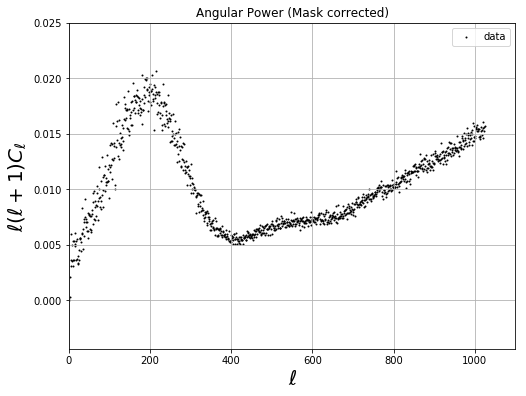

In [91]:

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(ell, ell * (ell + 1) * cl,
           s=4, c='black', lw=0,
           label='data')

ax.set_xlabel(r'$\ell$', fontsize="20")
ax.set_ylabel(r'$\ell(\ell+1)C_\ell$', fontsize="20")
ax.set_title('Angular Power (Mask corrected)')
ax.legend(loc='upper right')
ax.grid()
ax.set_xlim(0, 1100)

plt.show()


### Tutorial II: Verify that the average distance in a random walk goes with $\sqrt{N}$

We are going to show, simply but montecarlo simulation, that the average distance travelled in N steps in a random-walk goes with $\sqrt{N}$. 

We are going to do 1000 random-walks of 200 steps each in 1D where at each step it can go foward +1 or backward -1

In [ ]:
n_experiments = 1000
nsteps = 200

s = np.arange(nsteps)
# We are going to do it in 1D so step can be -1 or 1
steps = 2 * np.random.randint(0, 2,  size=(n_experiments, nsteps)) - 1

print steps.shape()

As can be seen steps is a 2D array of ```n_experiments``` and ```nsteps```.

Now we are going to calcualte the distance for each experiment by summing all steps for a given experiment. We can use the ```np.cumsum``` along the axis of ```nsteps```

In [94]:
distance = np.cumsum(steps, axis = 1) #along the second axis

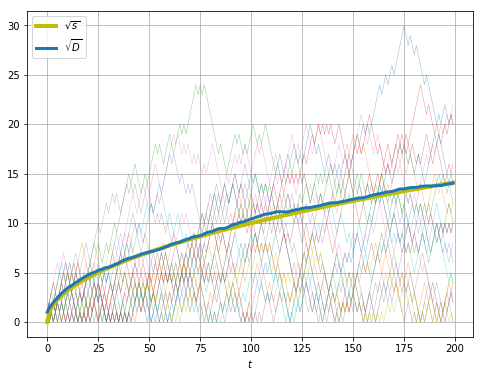

In [120]:
#Now we calculate the square distance  and the sqrt of the mean distance
sq_distance = distance**2
mean_sq_distance = np.mean(sq_distance, axis=0)

fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(111)
#Lets plot a few paths
for i in range(20):
    ax2.plot(s, np.abs(positions[i,:]), lw=0.5, alpha=0.5)
   
ax2.plot(s, np.sqrt(s), 'y-', label="$\sqrt{s}$", lw=4)
ax2.plot(s, np.sqrt(mean_sq_distance), label="$\sqrt{D}$", lw=3)
ax2.set_xlabel(r"$t$")
#ax2.set_ylim(-10, 10)
ax2.legend()
ax2.grid()
plt.show()

In [121]:
%load_ext version_information
%version_information numpy, matplotlib, astropy, scipy, healpy

Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.49)]
IPython 5.4.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.12.0
matplotlib 2.0.0
astropy 1.3
scipy 0.18.1
healpy 1.10.3
Tue Feb 27 15:16:26 2018 CET